# Title of your project

#### Student name(s)

Abstract of the project comes here.

## Table of Content

[Problem](#problem)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling](#modeling)   
[Evaluation](#evaluation)   
[References](#references)   


## Problem <a class="anchor" id="problem"></a>

Describe the problem here. What are the questions you are trying to solve?

Increasing population and humanity's intervention in natural life causes viral pandemic cases worldwide. These pandemics have economic and political effects, especially on human health. In this challenge, our aim is to provide the models that can make accurate predictions about __"confirmed cases"__ and __"fatalities”__ during the pandemic. Using data analysis techniques, we want to make conclusions about the pandemic, identify the factors that impact the transmission rate of COVID-19 and we want to make accurate forecasting by using machine learning methods[1] [2].  We will also help answer the following scientific questions of the __NASEM/WHO[3]__.


## Data Understanding<a class="anchor" id="data_understanding"></a>

In [10]:
#Importing libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a world map to show distributions of users 
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

# Using Time Series Date 
import datetime as dt
from datetime import timedelta

# Machine learning libraries
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score

import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf



In [4]:
# Loading data
train_data = pd.read_csv('data/covid19-global-forecasting-week-4/train.csv')
test_data = pd.read_csv('data/covid19-global-forecasting-week-4/test.csv')
countries_data = pd.read_csv('data/countries_useful_features.csv')

What data set are you going to use? Where will you get it from? Describe your data.

2019 Novel Coronavirus Data made available from the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) [4]. As of April 19, 2020, more than 2 million cases have been reported in 210 countries. 

The number of these data increases day by day. The data is split into training data and test data by Kaggle. The features in the train data (~27232 data) are as follows:
<ul> 
    <li>Id [ID]				: Unique Identifier</li>
    <li>Province_State [String]	: Province/state e.g. “Washington” in the U.S.</li>
    <li>Country_Region [String]	: Country where data is provided</li>
    <li>Date [String]			: Days between 22 Jan 20 - Present</li>
    <li>ConfirmedCases [Decimal]	: The number of confirmed cases</li>
    <li>Fatalities [Decimal]		: The number of registered deaths</li>
</ul>


In [5]:
train_data.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [6]:
test_data.head()

,ForecastId,Province_State,Country_Region,Date
0,1,NaN,Afghanistan,2020-04-02
1,2,NaN,Afghanistan,2020-04-03
2,3,NaN,Afghanistan,2020-04-04
3,4,NaN,Afghanistan,2020-04-05
4,5,NaN,Afghanistan,2020-04-06


In [7]:
countries_data.head()

,Country_Region,Population_Size,Tourism,Date_FirstFatality,Date_FirstConfirmedCase,Latitude,Longtitude,Mean_Age,Lockdown_Date,Lockdown_Type,Country_Code
0,Afghanistan,37172386,14000,2020-03-23,2020-02-25,33.939110,67.709953,17.3,2020-03-24,Full,AFG
1,Albania,2866376,5340000,2020-03-12,2020-03-10,41.153332,20.168331,36.2,2020-03-08,Full,ALB
2,Algeria,42228429,2657000,2020-03-13,2020-02-26,28.033886,1.659626,27.5,2020-03-24,Full,DZA
3,Andorra,77006,3042000,2020-03-23,2020-03-03,42.546245,1.601554,37.0,2020-03-16,Full,AND
4,Angola,30809762,218000,2020-03-30,2020-03-21,-11.202692,17.873887,16.4,NaN,NaN,AGO


In [8]:
train_data.describe(include='all')

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
count,33804.00000,14364,33804,33804,33804.000000,33804.000000
unique,NaN,133,184,108,NaN,NaN
top,NaN,Arizona,US,2020-03-27,NaN,NaN
freq,NaN,108,5832,313,NaN,NaN
mean,17838.50000,NaN,NaN,NaN,3037.990267,198.782452
std,10300.65312,NaN,NaN,NaN,16629.397127,1607.179156
min,1.00000,NaN,NaN,NaN,0.000000,0.000000
25%,8919.75000,NaN,NaN,NaN,0.000000,0.000000
50%,17838.50000,NaN,NaN,NaN,14.000000,0.000000
75%,26757.25000,NaN,NaN,NaN,414.250000,6.000000


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33804 entries, 0 to 33803
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              33804 non-null  int64  
 1   Province_State  14364 non-null  object 
 2   Country_Region  33804 non-null  object 
 3   Date            33804 non-null  object 
 4   ConfirmedCases  33804 non-null  float64
 5   Fatalities      33804 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.5+ MB


In [14]:
print("The lowest date in the train data set is", train_data['Date'].min() ,"and the highest", train_data['Date'].max())
print("The lowest date in the test data set is", test_data['Date'].min() ,"and the highest", test_data['Date'].max())

The lowest date in the train data set is 2020-01-22 and the highest 2020-05-08
The lowest date in the test data set is 2020-04-02 and the highest 2020-05-14


Explain what kind of data transformations, feature selection and/or engineering you will perform.

### Day by day analysis

In [18]:
train_data["Date"] = pd.to_datetime(train_data["Date"])

In [19]:
days = train_data.groupby(["Date"]).agg({"ConfirmedCases":'sum',"Fatalities":'sum'})
days["DayDifference"] = days.index - days.index.min()

In [20]:
days

,ConfirmedCases,Fatalities,DayDifference
Date,,,
2020-01-22,554.0,17.0,0 days
2020-01-23,653.0,18.0,1 days
2020-01-24,939.0,26.0,2 days
2020-01-25,1432.0,42.0,3 days
2020-01-26,2113.0,56.0,4 days
...,...,...,...
2020-05-04,3582630.0,251526.0,103 days
2020-05-05,3662193.0,257224.0,104 days
2020-05-06,3754748.0,263811.0,105 days


In [46]:
print("Countries with Disease Spread\t = ", len(train_data["Country_Region"].unique()))
print("Confirmed Cases around the World = ", days["ConfirmedCases"].iloc[-1])
print("Deaths Cases around the World\t = ", days["Fatalities"].iloc[-1])
print("Active Cases around the World\t = ", (days["ConfirmedCases"].iloc[-1] -- days["Fatalities"].iloc[-1]))

Countries with Disease Spread	 =  184
Confirmed Cases around the World =  3937319.0
Deaths Cases around the World	 =  274872.0
Active Cases around the World	 =  4212191.0


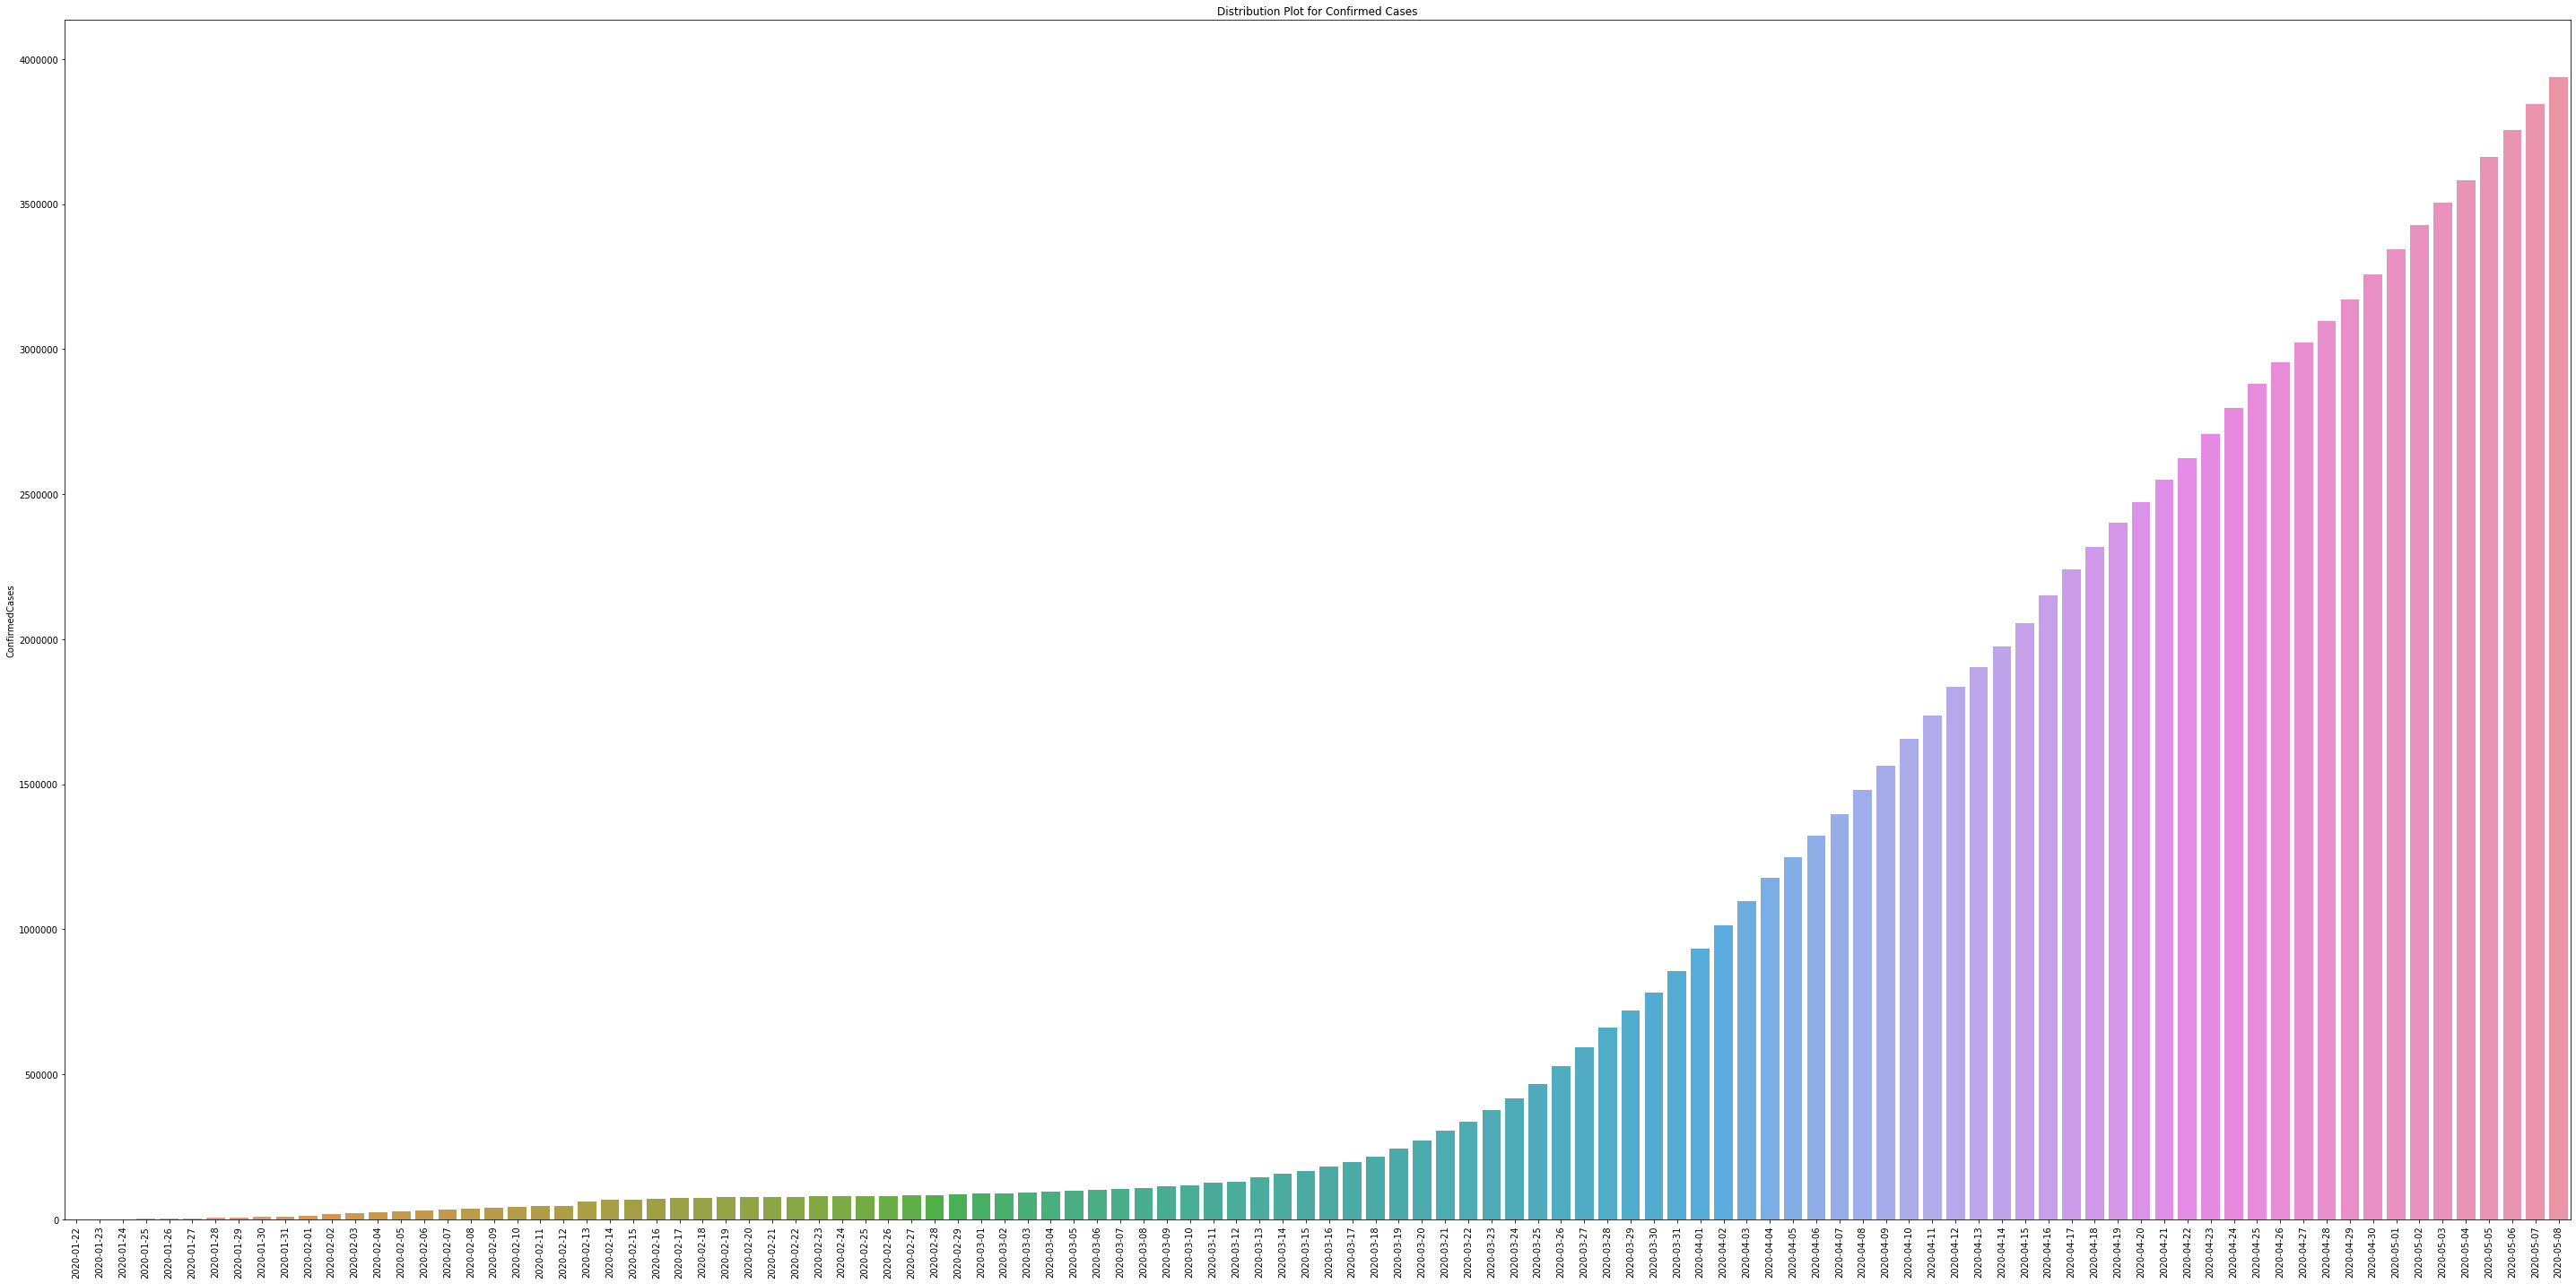

In [32]:
plt.figure(figsize = (40,20))
sns.barplot(x = days.index.date, y = days["ConfirmedCases"])
plt.title("Distribution Plot for Confirmed Cases")
plt.xticks(rotation=90)
plt.tight_layout()

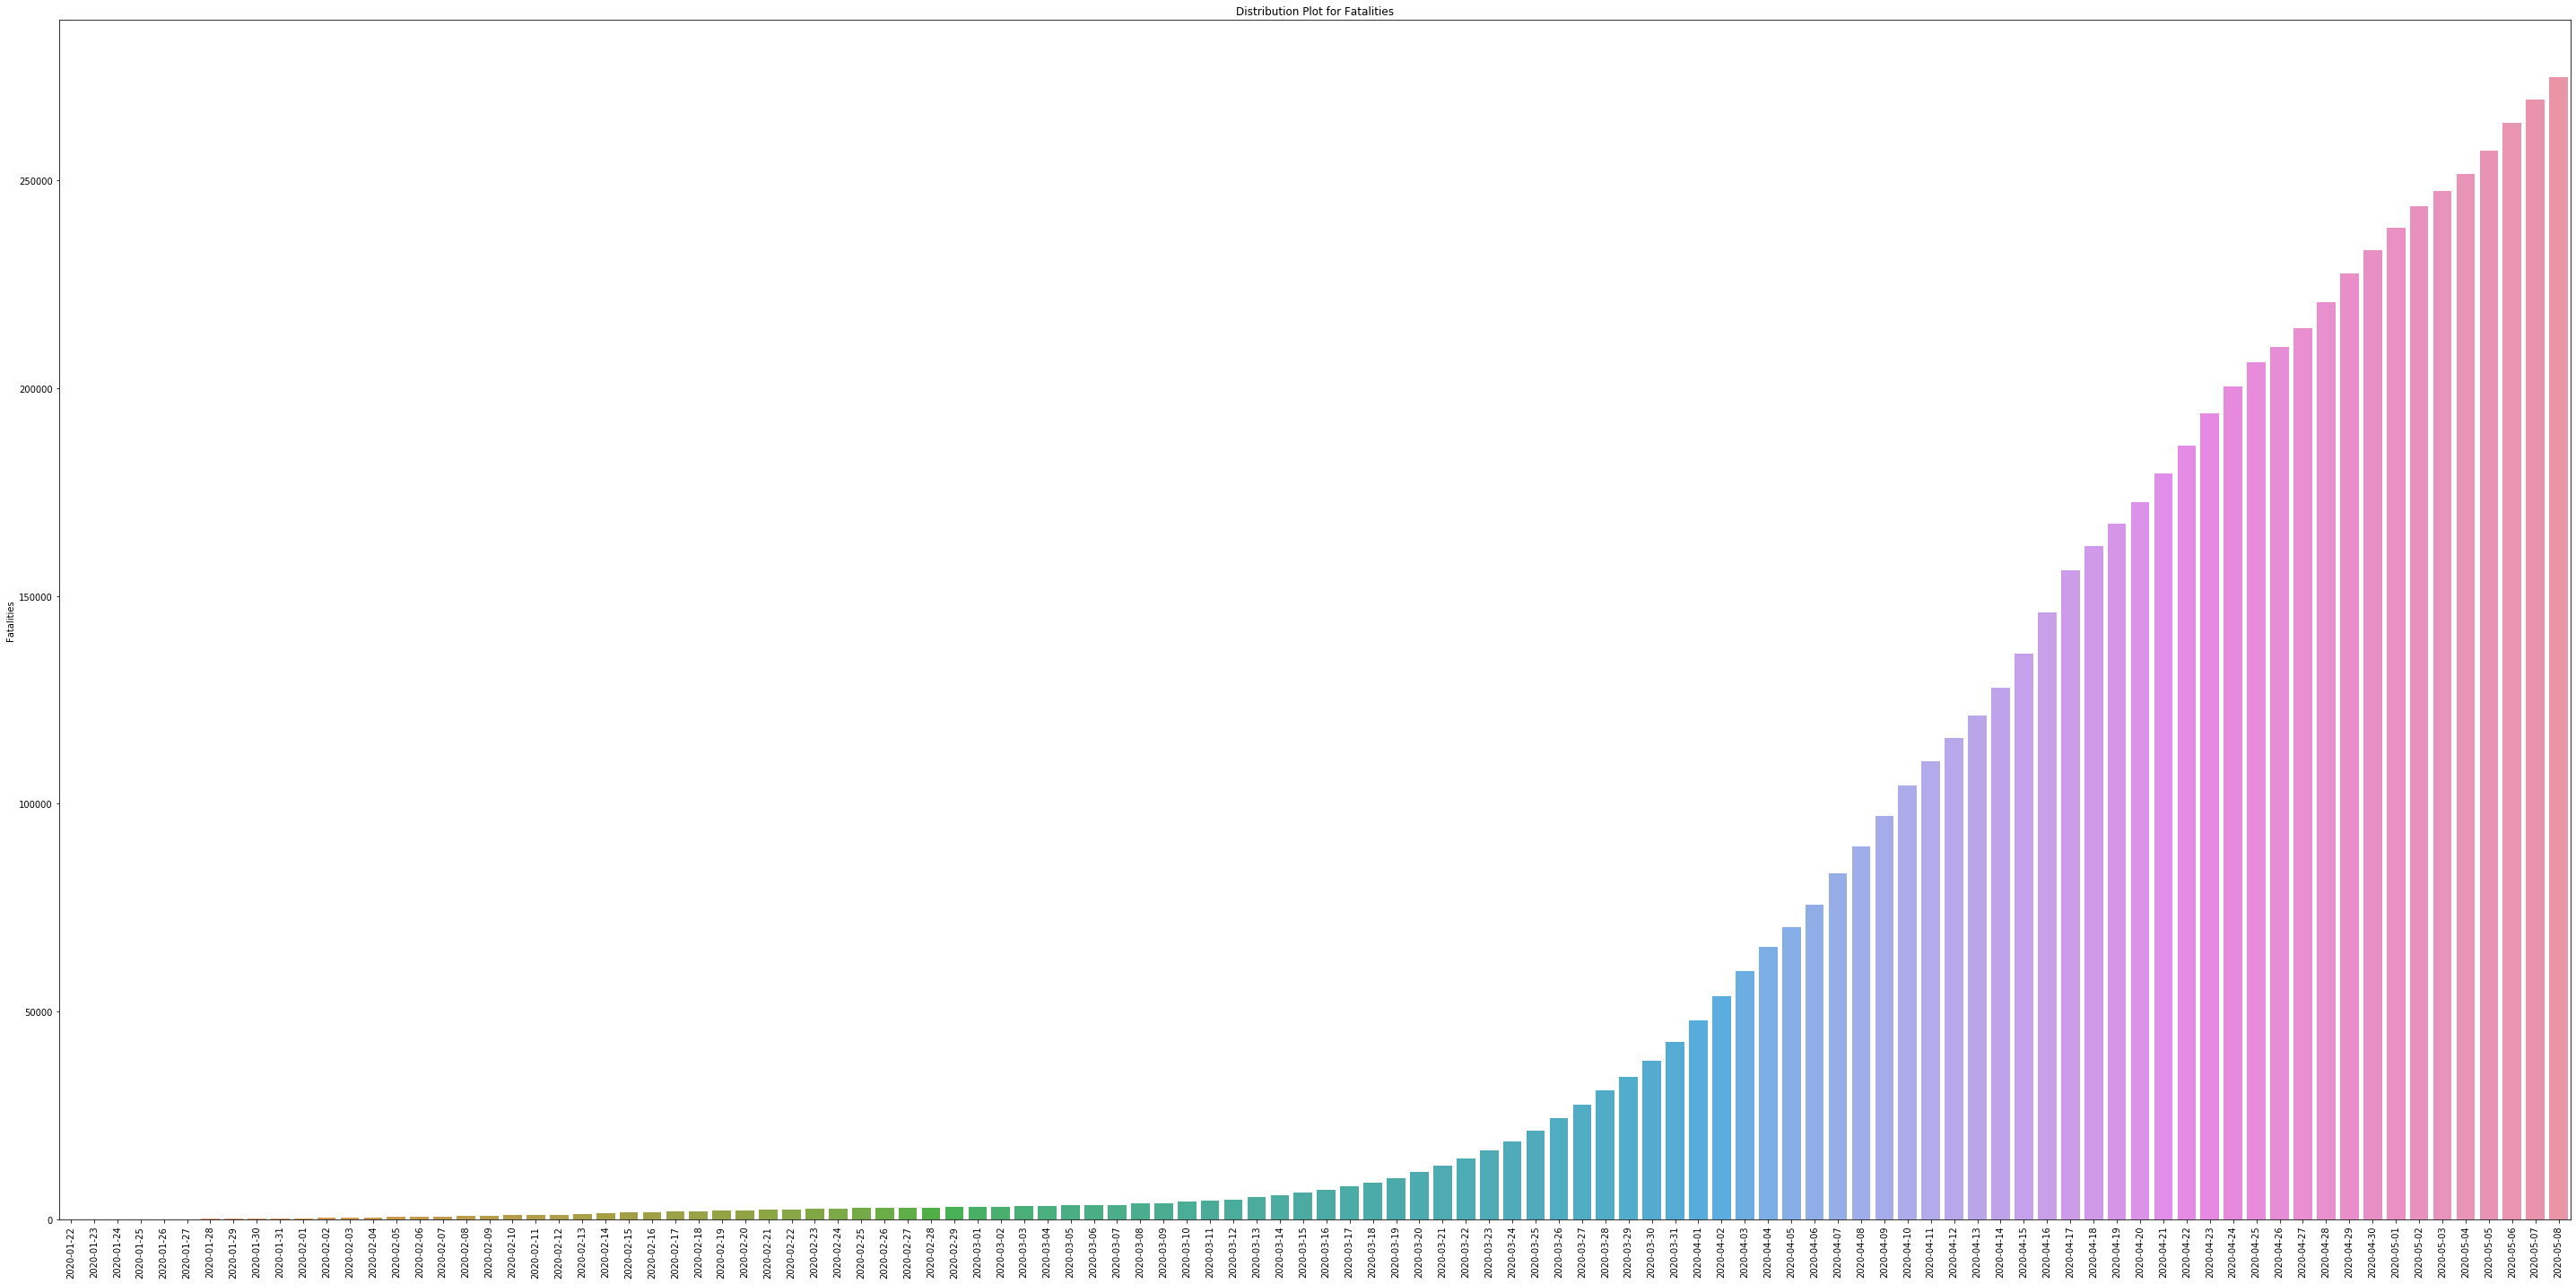

In [38]:
plt.figure(figsize=(40,20))
sns.barplot(x = days.index.date, y = days["Fatalities"])
plt.title("Distribution Plot for Fatalities")
plt.xticks(rotation=90)
plt.tight_layout()

## Modeling<a class="anchor" id="modeling"></a>

Which model will be used? Why? What parameters?

## Evaluation<a class="anchor" id="evaluation"></a>

Evaluate your model. Provide results, tables, charts, etc.

## References<a class="anchor" id="references"></a>


<ol>
[1] Hu, Zixin & Ge, Qiyang & Jin, Li & Xiong, Momiao. Artificial Intelligence Forecasting of COVID-19 in China.  <br/>
[2] Pavan K., Himangshu K., Shashikanta Patairiya, Yagya D. Forecasting the dynamics of COVID-19 Pandemic in Top 15 countries in April 2020: ARIMA Model with Machine Learning Approach  <br/>
[3] https://www.kaggle.com/...Open Scientific Questions on COVID-19.  <br/>
[4] https://github.com/CSSEGISandData/COVID-19  <br/>
[5] https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker  <br/>
[6] Microsoft 2020. Data Acquisition And Understanding Of Team Data Science Process.  <br/>
[7] Forecasting: Principles and Practice, Monash University, Australia , Rob J Hyndman and George Athanasopoulos https://otexts.com/fpp2/seasonal-arima.html  <br/>
    
<ol>


**Disclaimer!** <font color='grey'>This notebook was prepared by <student name(s)> as a term project for the *BBM469 - Data Intensive Applications Laboratory* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>